<a href="https://colab.research.google.com/github/sthanikan2000/CS3121-Project/blob/main/DS_Proj_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


from scipy.stats import pointbiserialr
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency

import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
emp = pd.read_csv('employee_preprocess_200635E.csv')

In [34]:
emp.columns

Index(['Employee_No', 'Title', 'Gender', 'Marital_Status', 'Date_Joined',
       'Date_Resigned', 'Status', 'Employment_Category', 'Employment_Type',
       'Religion', 'Designation', 'Year_of_Birth', 'Hourly_Time',
       'Late_minutes', 'Type_Full Day', 'Type_Half Day', 'apply_type_Anual',
       'apply_type_Casual', 'Earnings', 'Total Fixed', 'Year_Joined',
       'Resigned_Age', 'Worked_Duration'],
      dtype='object')

In [35]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Employee_No          997 non-null    int64  
 1   Title                997 non-null    object 
 2   Gender               997 non-null    object 
 3   Marital_Status       997 non-null    object 
 4   Date_Joined          997 non-null    object 
 5   Date_Resigned        764 non-null    object 
 6   Status               997 non-null    object 
 7   Employment_Category  997 non-null    object 
 8   Employment_Type      997 non-null    object 
 9   Religion             997 non-null    object 
 10  Designation          997 non-null    object 
 11  Year_of_Birth        997 non-null    int64  
 12  Hourly_Time          742 non-null    float64
 13  Late_minutes         742 non-null    float64
 14  Type_Full Day        57 non-null     float64
 15  Type_Half Day        57 non-null     flo

# Finding association of Status with the other variables

> To compare the Status with numerical variables, we must encode it to suitable numerical representation.

> So, I'm doing OneHotEncoding the "Active" category of "Status". It will return numerical values as 0 for "Inactive" Status and 1 for "Active" Status.



In [36]:
# Use pd.get_dummies() to one-hot encode the 'Status' variable
emp["Status_Encoded"] = pd.get_dummies(emp['Status'], prefix='Status')["Status_Active"]

## Status with other Nominal Variables

- Other nominal variables: 'Title', 'Gender', 'Marital_Status', 'Employment_Category', 'Employment_Type', 'Religion', 'Designation'

In [52]:
for var in ['Title', 'Gender', 'Marital_Status', 'Employment_Category', 'Employment_Type', 'Religion', 'Designation',"Marital_Status"]:
  contingency_table = pd.crosstab(emp[var], emp['Status'])
  chi2, p_value, dof, expected = chi2_contingency(contingency_table)
  print("Chi-square test between %s and Status"%(var))
  print("Chi-square test statistic:", chi2)
  print("p-value:", p_value)

Chi-square test between Title and Status
Chi-square test statistic: 4.26213448068514
p-value: 0.11871053355209335
Chi-square test between Gender and Status
Chi-square test statistic: 3.658364238835724
p-value: 0.05578837958109029
Chi-square test between Marital_Status and Status
Chi-square test statistic: 3.4889855592529972
p-value: 0.06177843105135954
Chi-square test between Employment_Category and Status
Chi-square test statistic: 19.420488818889872
p-value: 6.065888667228195e-05
Chi-square test between Employment_Type and Status
Chi-square test statistic: 6.635632103042585
p-value: 0.00999587204002437
Chi-square test between Religion and Status
Chi-square test statistic: 4.0461987006202955
p-value: 0.256518523656958
Chi-square test between Designation and Status
Chi-square test statistic: 232.601623555578
p-value: 4.5254947645007056e-08
Chi-square test between Marital_Status and Status
Chi-square test statistic: 3.4889855592529972
p-value: 0.06177843105135954


## Status with other Variables

- Other variables without null values: 'Year_of_Birth', 'Year_Joined'
- Other variables with null values:'Hourly_Time', 'Late_minutes', 'Type_Full Day', 'Type_Half Day', 'apply_type_Anual', 'apply_type_Casual', 'Earnings', 'Total Fixed', 'Worked_Duration', 'Resigned_Age'

In [38]:
# for var in ['Date_Joined', 'Date_Resigned']:
  # emp[var]=pd.to_datetime(emp[var]).dt.year


In [39]:
from datetime import datetime

current_year=datetime.now().year

In [40]:
emp["current_working_duration"]=current_year-emp["Year_Joined"]
emp["current_age"]=current_year-emp["Year_of_Birth"]

In [42]:
emp.loc[emp["Resigned_Age"].isnull(),"Resigned_Age"]=emp.loc[emp["Resigned_Age"].isnull(),"current_age"]

In [47]:
emp.loc[emp["Worked_Duration"].isnull(),"Worked_Duration"]=emp.loc[emp["Worked_Duration"].isnull(),"current_working_duration"]

In [48]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee_No               997 non-null    int64  
 1   Title                     997 non-null    object 
 2   Gender                    997 non-null    object 
 3   Marital_Status            997 non-null    object 
 4   Date_Joined               997 non-null    object 
 5   Date_Resigned             764 non-null    object 
 6   Status                    997 non-null    object 
 7   Employment_Category       997 non-null    object 
 8   Employment_Type           997 non-null    object 
 9   Religion                  997 non-null    object 
 10  Designation               997 non-null    object 
 11  Year_of_Birth             997 non-null    int64  
 12  Hourly_Time               742 non-null    float64
 13  Late_minutes              742 non-null    float64
 14  Type_Full 

In [49]:
for var in ['Year_of_Birth', 'Year_Joined', 'Worked_Duration', 'Resigned_Age']:
  correlation, p_value = pointbiserialr(emp[var], emp['Status_Encoded'])
  print("Point-biserial correlation coefficient between %s and Status:"%(var))
  print("correlation coefficient:", correlation)
  print("p-value:", p_value)

Point-biserial correlation coefficient between Year_of_Birth and Status:
correlation coefficient: 0.03044778405416198
p-value: 0.33684652520741376
Point-biserial correlation coefficient between Year_Joined and Status:
correlation coefficient: -0.07934992199581392
p-value: 0.012199936211714233
Point-biserial correlation coefficient between Worked_Duration and Status:
correlation coefficient: 0.32161001278491747
p-value: 2.003597546235038e-25
Point-biserial correlation coefficient between Resigned_Age and Status:
correlation coefficient: 0.03293762143847391
p-value: 0.2988081179913326


In [50]:
for var in ['Hourly_Time', 'Late_minutes', 'Type_Full Day', 'Type_Half Day', 'apply_type_Anual', 'apply_type_Casual', 'Earnings', 'Total Fixed']:
  temp_df=emp[~emp[var].isnull()]
  correlation, p_value = pointbiserialr(temp_df[var], temp_df['Status_Encoded'])
  print("Point-biserial correlation coefficient between %s and Status:"%(var))
  print("correlation coefficient:", correlation)
  print("p-value:", p_value)

Point-biserial correlation coefficient between Hourly_Time and Status:
correlation coefficient: 0.008797931359329656
p-value: 0.8109090996148427
Point-biserial correlation coefficient between Late_minutes and Status:
correlation coefficient: 0.02234419736193237
p-value: 0.5433874976436639
Point-biserial correlation coefficient between Type_Full Day and Status:
correlation coefficient: 0.30087297689488
p-value: 0.022954448932351584
Point-biserial correlation coefficient between Type_Half Day and Status:
correlation coefficient: 0.3025643469146815
p-value: 0.02216028713844025
Point-biserial correlation coefficient between apply_type_Anual and Status:
correlation coefficient: 0.2637032468449057
p-value: 0.047474296855775484
Point-biserial correlation coefficient between apply_type_Casual and Status:
correlation coefficient: 0.2921269650637013
p-value: 0.027454765346372954
Point-biserial correlation coefficient between Earnings and Status:
correlation coefficient: 0.19793774646363876
p-val

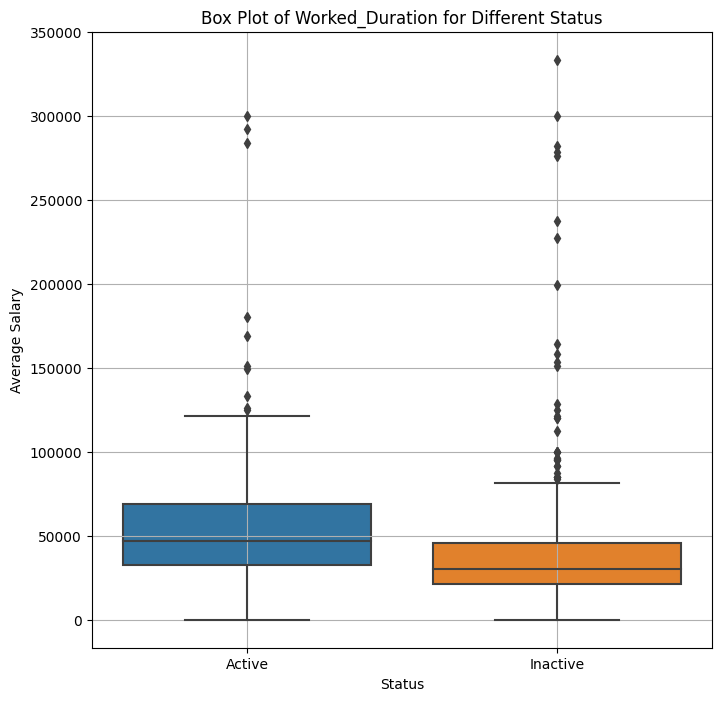

In [70]:
# Create the box plot using seaborn
plt.figure(figsize=(8, 8))
sns.boxplot(x='Status', y='Earnings', data=emp)

# Set labels and title
plt.xlabel('Status')
plt.ylabel('Average Salary')
plt.title('Box Plot of Worked_Duration for Different Status')

# Show the plot
plt.grid(True)
plt.show()



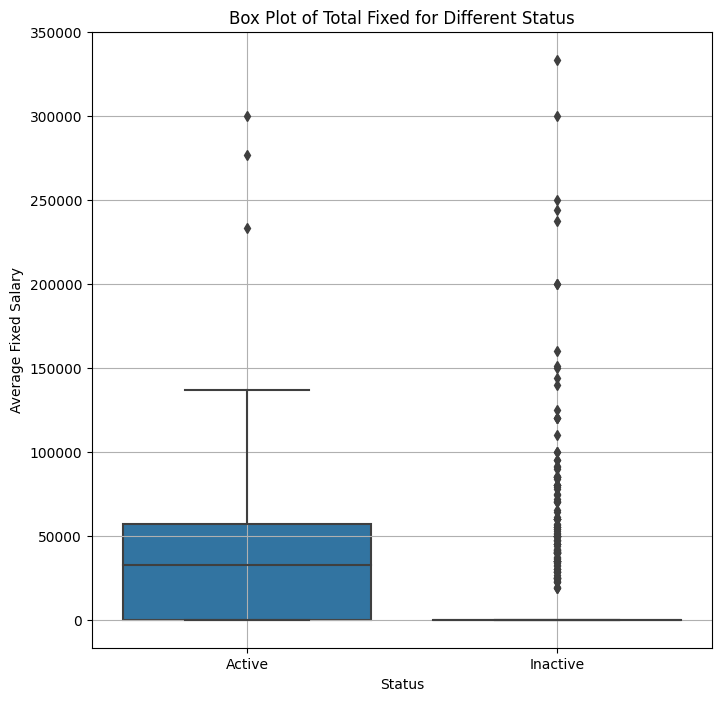

In [71]:
# Create the box plot using seaborn
plt.figure(figsize=(8, 8))
sns.boxplot(x='Status', y='Total Fixed', data=emp)

# Set labels and title
plt.xlabel('Status')
plt.ylabel('Average Fixed Salary')
plt.title('Box Plot of Total Fixed for Different Status')

# Show the plot
plt.grid(True)
plt.show()



In [73]:
df=emp[emp["Status"]=="Inactive"]

In [74]:
df.shape

(764, 26)

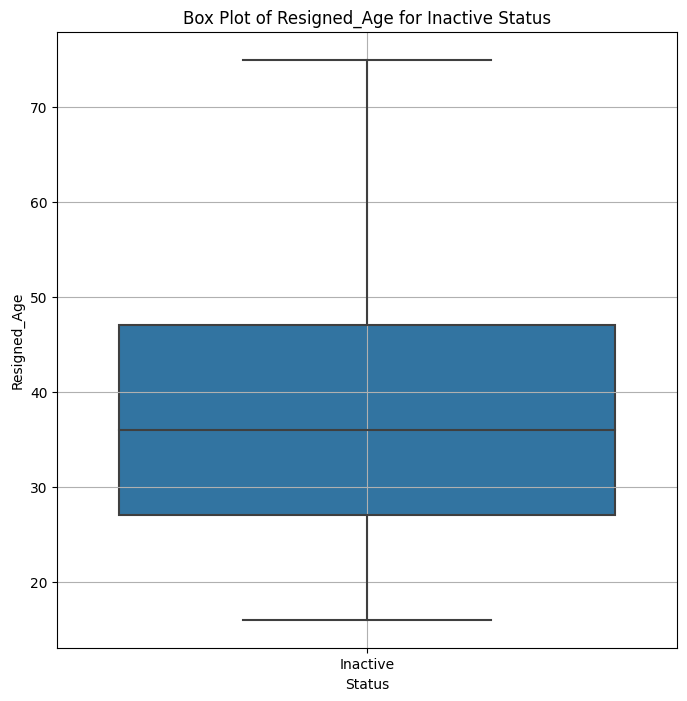

In [76]:
# Create the box plot using seaborn
plt.figure(figsize=(8, 8))
sns.boxplot(x='Status', y='Resigned_Age', data=df)

# Set labels and title
plt.xlabel('Status')
plt.ylabel('Resigned_Age')
plt.title('Box Plot of Resigned_Age for Inactive Status')

# Show the plot
plt.grid(True)
plt.show()

